<a href="https://colab.research.google.com/github/aliderakhshan381/Tweets-Sentiment-Analysis/blob/master/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sentiment_tweet.csv')
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


['neutral' 'positive' 'negative']


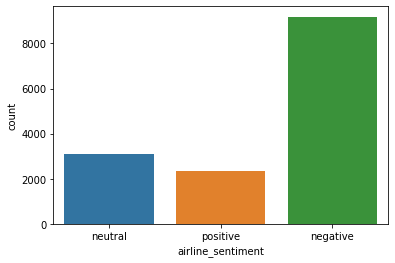

In [ ]:
print(df.airline_sentiment.unique())
sns.countplot(x='airline_sentiment', data=df)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from nltk.corpus import stopwords
import nltk

df = pd.read_csv('/content/drive/MyDrive/sentiment_tweet.csv')
# Categorical Encoding for airline_sentiment
df = df[['text', 'airline_sentiment']]
ord_enc = OrdinalEncoder()
df['airline_sentiment_coded'] = ord_enc.fit_transform(df[['airline_sentiment']])

df['text'] = df['text'].str.lower()

# Remove Stopwords

nltk.download('stopwords') # Run this once
stop_wrods = set(stopwords.words('english'))


def removeStopWords(text):
    return " ".join([word for word in str(text).split() if word not in stop_wrods])

df['text'] = df['text'].apply(lambda text: removeStopWords(text))
# df['text'] = df['text'].apply(lambda text: removestopwords(text))

# Remove Punctuation

import string
punctuations = string.punctuation

def removePunctuation(text):
    translator = str.maketrans('', '', punctuations)
    return text.translate(translator)

df['text'] = df['text'].apply(lambda text: removePunctuation(text))

# Remove URL's
import re
def removeURLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

df['text'] = df['text'].apply(lambda text: removeURLs(text))
df.head()

# Tokenize Tweets
from nltk.tokenize import word_tokenize

nltk.download('punkt') # Run Once
df['text'] = df['text'].apply(word_tokenize)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Stemming 
import nltk

st = nltk.PorterStemmer()
df['text'] = df['text'].apply(lambda x: [st.stem(y) for y in x])

# Lemmization

nltk.download('wordnet') # Run Once

lm = nltk.WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [lm.lemmatize(y) for y in x])
df['text'] = df['text'].apply(lambda x: ' '.join(y for y in x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf = TfidfVectorizer()
text_tf = tf.fit_transform(df['text'])

X , y = text_tf, df['airline_sentiment_coded']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123456)

In [ ]:
df_idf = pd.DataFrame(tf.idf_, index=tf.get_feature_names(),columns=["idf_weights"]) 
df_idf.sort_values(by=['idf_weights'])

,idf_weights
flight,2.327218
unit,2.328764
usairway,2.588218
americanair,2.603038
southwestair,2.788146
...,...
helpphon,9.898434
helpthank,9.898434
helpunitedsuck,9.898434
helpgot,9.898434


#Model
>Now we Test 2 different algorithm

1. SVM (Support Vector Machine)
1. Logistic Regression


              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1836
         1.0       0.62      0.51      0.56       612
         2.0       0.74      0.66      0.70       480

    accuracy                           0.78      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.77      0.78      0.77      2928



<Figure size 720x720 with 0 Axes>

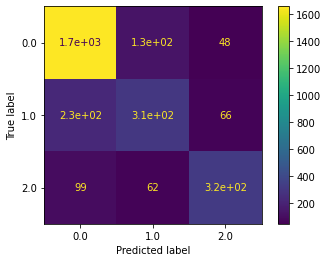

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

svclinear = LinearSVC()
svclinear.fit(x_train, y_train)

y_pred = svclinear.predict(x_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,10))
plot_confusion_matrix(svclinear, x_test, y_test)
plt.show()

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      1836
         1.0       0.67      0.47      0.55       612
         2.0       0.79      0.60      0.68       480

    accuracy                           0.78      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928



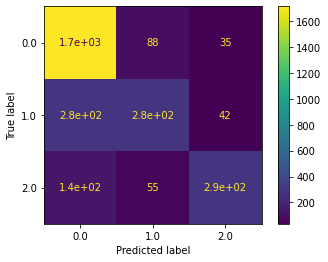

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, solver='newton-cg')
log_reg.fit(x_train, y_train)

y_pred_reg = log_reg.predict(x_test)
print(classification_report(y_true=y_test, y_pred=y_pred_reg))

plot_confusion_matrix(log_reg, x_test, y_test)
plt.show()